# Анализ маркетинговой стратегии развлекательного приложения Procrastinate Pro+

### Краткое описание проекта

Компания, владеющая развлекательным приложением Procrastinate Pro+ инвестирует огромные средства в рекламу. Однако, последние несколько месяцев компания терпит убытки. Главная задача — разобраться в причинах и помочь компании выйти в плюс.

Из открытых источников доступны следующие данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
1. лог сервера с данными об их посещениях;
2. выгрузка их покупок за этот период;
3. рекламные расходы.

Необходимо изучить:
1. откуда приходят пользователи и какими устройствами они пользуются;<br>
2. сколько стоит привлечение пользователей из различных рекламных каналов;<br>
3. сколько денег приносит каждый клиент;<br>
4. когда расходы на привлечение клиента окупаются;<br>
5. какие факторы мешают привлечению клиентов.<br>

<b>Цель исследования</b> - найти причины нерентабельности запущенных рекламных кампаний и сформулировать рекомендации для отдела маркетинга:<br>
1. Посчитать LTV, ROI, удержания и конверсии.
2. Провести исследовательский анализ данных.
3. Провести анализ расходов на маркетинговые активности.
5. Оценить окупаемость рекламы, используя графики LTV, ROI и CAC.

<b>Ход исследования</b><br><br>
Данные о о визитах, заказах и рекламных расходах - были получены из файлов: /datasets/visits_info_short.csv, /datasets/orders_info_short.csv, /datasets/costs_info_short.csv. О качестве данных ничего неизвестно. Поэтому перед поиском причин убытков, возникших после запуска рекламных кампаний, понадобится обзор данных.
    
В ходе исследования необходимо преобразовать данные в нужные типы, проверить данные на наличие пропусков, а также найти другие ошибки и оценить их влияние на исследование. Затем, после этапа предобработки провести исследовательский анализ данных, расчитать метрики LTV, CAC и ROI и оценить окупаемость рекламы.
 
Таким образом, исследование пройдёт в четыре этапа:
 1. Обзор данных.
 2. Задать функции для расчета LTV, ROI, удержания и конверсии.
 3. Исследовательский анализ данных.
 4. Маркетинг.
 5. Оценить окупаемость рекламы.
    </div>

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'), #визиты
    pd.read_csv('/datasets/orders_info_short.csv'), #заказы
    pd.read_csv('/datasets/costs_info_short.csv'),  #расходы
)

**1.1. Знакомство с датафреймами**

In [3]:
display(visits, orders, costs)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


**1.2. Основная информация о датафреймах**

In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [6]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


**1.3. Замена названий столбцов (приведение к нижнему регистру)**

In [7]:
# переименование столбцов в датафреймах visits, orders, costs
visits = visits.rename(columns={'User Id' : 'user_id' , 'Region' : 'region' , 'Device' : 'device', 'Channel' : 'channel' , 'Session Start' : 'session_start', 'Session End': 'session_end'})
orders = orders.rename(columns={'User Id': 'user_id', 'Event Dt' : 'event_dt', 'Revenue': 'revenue'})
costs = costs.rename(columns={'Channel' : 'channel'})

In [8]:
# проверка результатов - перечень названий столбцов
visits.columns
orders.columns
costs.columns

Index(['dt', 'channel', 'costs'], dtype='object')

**1.4. Исследование, проверка на пропуски в данных и изменение типов данных**

In [9]:
#посчитаем количество пропусков в процентах в каждом столбце датафрейма visits
pd.DataFrame(round(visits.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
user_id,0.000000
region,0.000000
device,0.000000
channel,0.000000
session_start,0.000000
session_end,0.000000


In [10]:
#посчитаем количество пропусков в процентах в каждом столбце датафрейма orders
pd.DataFrame(round(orders.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
user_id,0.000000
event_dt,0.000000
revenue,0.000000


In [11]:
#посчитаем количество пропусков в процентах в каждом столбце датафрейма costs
pd.DataFrame(round(costs.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
dt,0.000000
channel,0.000000
costs,0.000000


In [12]:
#проверка на дубликаты в таблице visits
visits.duplicated().sum()

0

In [13]:
#проверка на дубликаты в таблице orders
orders.duplicated().sum()

0

In [14]:
#проверка на дубликаты в таблице costs
costs.duplicated().sum()

0

In [15]:
#преобразование данных о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

**Выводы по предобработке данных**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Пропуски в данных не обнаружены.
<div>Дубликаты во всех трех датафреймах (`visits`, `orders`, `costs`) также отсутствуют.
<div>Cтолбцы с датой и временем переведены в соответствующий тип данных.
    

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

**3.1. Функции для создания профилей, расчёта удержания, конверсии, LTV и ROI: get_profiles(), get_retention(), get_conversion() и get_ltv()**.

In [16]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    #for event in event_names:
        #if event in events['event_name'].unique():
            #profiles[event] = profiles['user_id'].isin(
                #events.query('event_name == @event')['user_id'].unique()
            #)

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [17]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [18]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [19]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

**3.2. Функции для визуализации этих метрик — filter_data(), plot_retention(), plot_conversion() и plot_ltv_roi().**

In [20]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [21]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [22]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [23]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

**4.1. Профили пользователей. Минимальные и максимальные даты привлечения пользователей.**

In [24]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
display(profiles.head(10))  

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-01,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.250435


In [25]:
# определите доступный интервал привлечения пользователей
min_analysis_date = profiles['dt'].min()
max_analysis_date = profiles['dt'].max()# ваш код здесь
print(min_analysis_date, max_analysis_date)

2019-05-01 2019-10-27


Установим момент и горизонт анализа данных. Предположим, что на календаре 1 ноября 2019 года, и зададим двухнедельный горизонт анализа.

In [26]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

**Вывод**

<p></p>
<div style="border:solid green 2px; padding: 20px">
<div> Минимальная дата привлечения пользователей - 2019-05-01.
<div> Максимальная дата привлечения пользователей - 2019-10-27.
<div>Горизонт анализа = 14 дней.
    

**4.2.Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.**

In [27]:
profiles.groupby('region').agg({'user_id': 'nunique','payer':'mean'}).sort_values(by='payer', ascending = False)# допишите код

,user_id,payer
region,,
United States,100002,0.069019
Germany,14981,0.041119
UK,17575,0.039829
France,17450,0.037994


**Вывод**

<p></p>
<div style="border:solid green 2px; padding: 20px">
<div> Пользователи приходят в приложение из США, Германии, Великобритании и Франции. Больше всего платящих пользователей приходится на США (доля составляет 0,069). Германия по количеству пользователей приложения занимает последнее место (14 981 уникальный пользователь).

In [28]:
profiles.groupby('device').agg({'user_id': 'nunique', 'payer': 'mean'}).sort_values(by='payer', ascending = False)

,user_id,payer
device,,
Mac,30042,0.063644
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468


**Вывод**

<p></p>
<div style="border:solid green 2px; padding: 20px">
<div> Пользователи используют следующие устройства для захода в приложение: Mac, iPhone, Android, PC. Наибольшее количество пользователей используют iPhone (54479 уникальных пользователей). Наименьшее количество пользователей приложения используют Mac (30042 уникальных пользователя). При этом доля платящих пользователей самая высокая у пользователей Мас (0,063), и самая низкая доля у РС (0,05). 

**4.4.Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.**

In [29]:
profiles.groupby('channel').agg({'user_id': 'nunique', 'payer' : 'mean'}).sort_values(by='payer', ascending=False)

,user_id,payer
channel,,
FaceBoom,29144,0.122049
AdNonSense,3880,0.113402
lambdaMediaAds,2149,0.104700
TipTop,19561,0.096007
RocketSuperAds,4448,0.079137
WahooNetBanner,8553,0.052964
YRabbit,4312,0.038265
MediaTornado,4364,0.035747
LeapBob,8553,0.030633


**Вывод**

<p></p>
<div style="border:solid green 2px; padding: 20px">
<div> Больше всего пользователей пришло через органический трафик (56 439 уникальных пользователя). На втором месте из популярных источников оказался  FaceBoom	(29 144 уникальных пользователя). На третьем месте TipTop (19 561 уникальный пользователь). Остальные источники привлечения пользователей занимают менее существенную долю от общего трафика.
<div> Среди платящих пользователей наибольшую долю (0,122) составляют пользователи FaceBoom. А наименьшую долю составляют пользователи, пришедшие через органический трафик (0,0205). Что является вполне логичной закономерностью.    

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

**5.1.Посчитайте общую сумму расходов на маркетинг.**

In [30]:
#исключим органических пользователей
profiles = profiles.query('channel != "organic"')
display(profiles)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
...,...,...,...,...,...,...,...,...,...
149999,999942424543,2019-05-24 21:03:26,TipTop,iPhone,United States,2019-05-24,2019-05-01,False,1.900000
150001,999949280903,2019-08-12 06:47:27,FaceBoom,Mac,United States,2019-08-12,2019-08-01,False,1.117838
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000


In [31]:
costs['costs'].sum()

105497.30000000002

**Вывод**

<p></p>
<div style="border:solid green 2px; padding: 20px">
<div>Общая сумма расходов на маркетинг составила 105 497.3. Данные взяты из соответствующей таблицы costs.

**5.2.Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.**

In [32]:
profiles.groupby('channel').agg({'user_id' : 'nunique', 'acquisition_cost' : 'sum'}).sort_values(by='acquisition_cost', ascending=False)

,user_id,acquisition_cost
channel,,
TipTop,19561,54751.30
FaceBoom,29144,32445.60
WahooNetBanner,8553,5151.00
AdNonSense,3880,3911.25
OppleCreativeMedia,8605,2151.25
RocketSuperAds,4448,1833.00
LeapBob,8553,1797.60
lambdaMediaAds,2149,1557.60
MediaTornado,4364,954.48


**Вывод**

<p></p>
<div style="border:solid green 2px; padding: 20px">
<div> Практически 52% от доли общих затрат на рекламу занимают расходы на привлечение клиентов через источник TipTop (54751.30). 
<div> Около 31% от доли общих затрат на рекламу занимают расходы через источник FaceBoom (32445.60). Менее 1% вложили в привлечение клиентов через источник YRabbit (944.22). Источник привлечения organic является бесплатным, соответственно не несет затрат, что подтверждает сводная таблица.

**5.3.Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.**

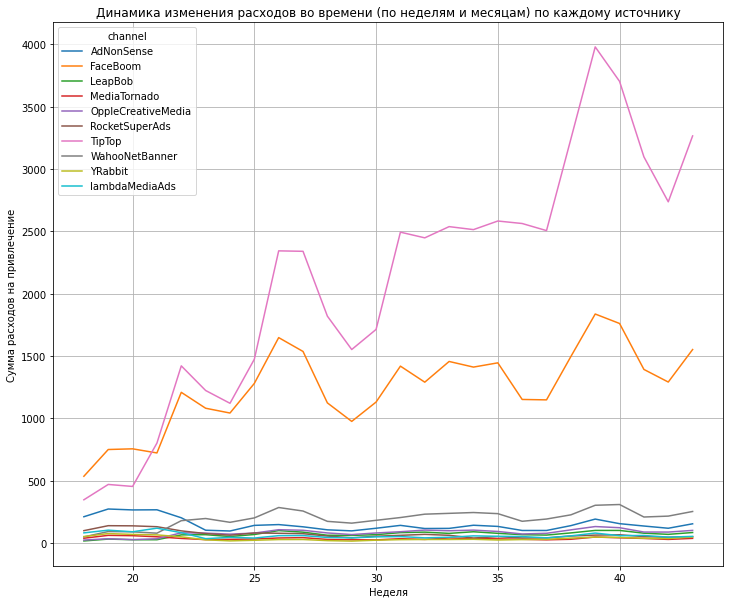

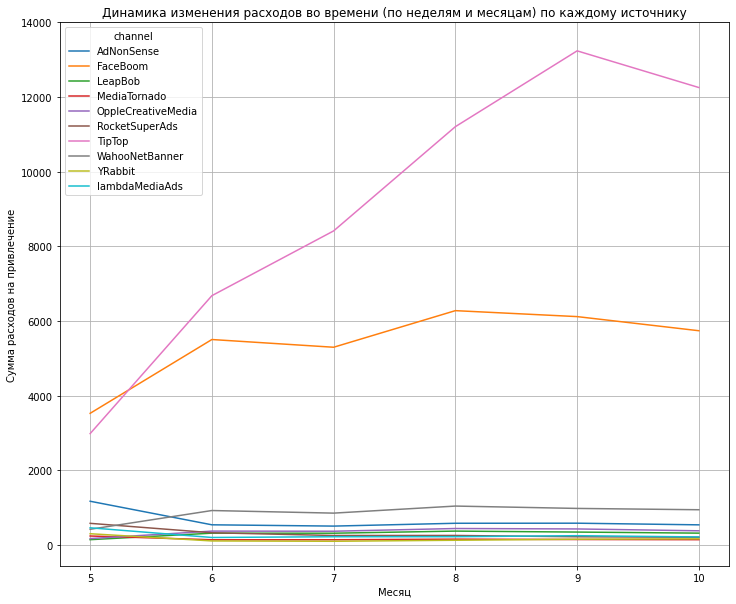

In [33]:
# строим график динамики затрат на рекламу по источникам
costs['dt'] = pd.to_datetime(costs['dt'])
costs['week_number'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month

pivot_data_week = costs.pivot_table(index='week_number', columns='channel', values='costs', aggfunc='sum')
pivot_data_month = costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')

#print(pivot_data)
#fig=plt.figure()
#ax1=fig.add_subplot(1,2,1)

pivot_data_week.plot(figsize=(12,10), grid=True, label='Каналы привлечения пользователей', legend=True)

plt.xticks()
plt.yticks(np.arange(0,4100,500))
plt.title('Динамика изменения расходов во времени (по неделям и месяцам) по каждому источнику')
plt.xlabel('Неделя')
plt.ylabel('Сумма расходов на привлечение')
plt.show()

#ax2=fig.add_subplot(1,2,2)

pivot_data_month.plot(figsize=(12,10), grid=True, label='Каналы привлечения пользователей', legend=True)

plt.xticks()
plt.yticks(np.arange(0,15000,2000))
plt.title('Динамика изменения расходов во времени (по неделям и месяцам) по каждому источнику')
plt.xlabel('Месяц')
plt.ylabel('Сумма расходов на привлечение')
plt.show()


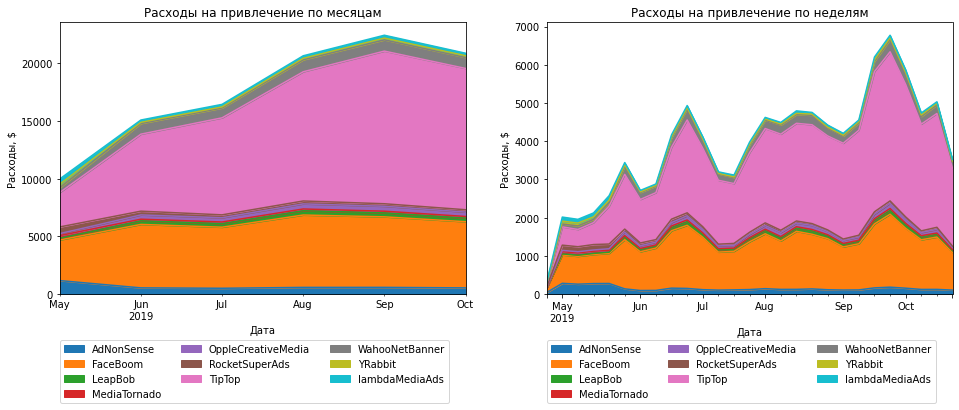

In [34]:
costs['Расходы на привлечение по месяцам'] = costs['dt'].astype('datetime64[M]')
costs['Расходы на привлечение по неделям'] = costs['dt'].astype('datetime64[W]')

columns = ['Расходы на привлечение по месяцам', 'Расходы на привлечение по неделям']

plt.subplots(figsize = (16, 5))
for i, col in enumerate(columns):
    costs.pivot_table(index = col, columns = 'channel', values = 'costs', 
                      aggfunc = 'sum').plot.area(ax = plt.subplot(1, 2, i + 1))
    plt.title(col)
    plt.xlabel('Дата')
    plt.ylabel('Расходы, $')
    plt.legend(ncol=3, bbox_to_anchor=(0, -0.4), loc='lower left', borderaxespad=0)
plt.show()

 **Вывод**

<p></p>
<div style="border:solid green 2px; padding: 20px">
<div>Привлечение одного пользователя из рекламной сети «TipTop» обошлось компании в среднем в 3000$, на втором месте FaceBoom. Во времени значительно с каждым месяцем увеличиваются расходы на рекламу через источник «TipTop». На втором месте в динамике по расходам на рекламу источник FaceBoom. На все остальные источники привлечения клиентов, роста по расходам во времени не наблюдается. 

**5.4.Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.**

In [34]:
profiles.groupby('channel').agg({'user_id' : 'nunique', 'acquisition_cost' : 'mean'}).sort_values(by='acquisition_cost', ascending=False)

,user_id,acquisition_cost
channel,,
TipTop,19561,2.799003
FaceBoom,29144,1.113286
AdNonSense,3880,1.008054
lambdaMediaAds,2149,0.724802
WahooNetBanner,8553,0.602245
RocketSuperAds,4448,0.412095
OppleCreativeMedia,8605,0.250000
YRabbit,4312,0.218975
MediaTornado,4364,0.218717


**Вывод**

<p></p>
<div style="border:solid green 2px; padding: 20px">
<div>В среднем привлечение одного пользователя в приложение через источник "TipTop" стоило 2.799003. Это самая дорогая стоимость привлечения одного пользователя (САС), если сравнить затраты по остальным источникам. Средний размер CAC для всего проекта равен 1.1274.

In [35]:
#определим средний САС для всего проекта в целом
profiles['acquisition_cost'].mean()

1.1274813239427588

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

**6.1.Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.**

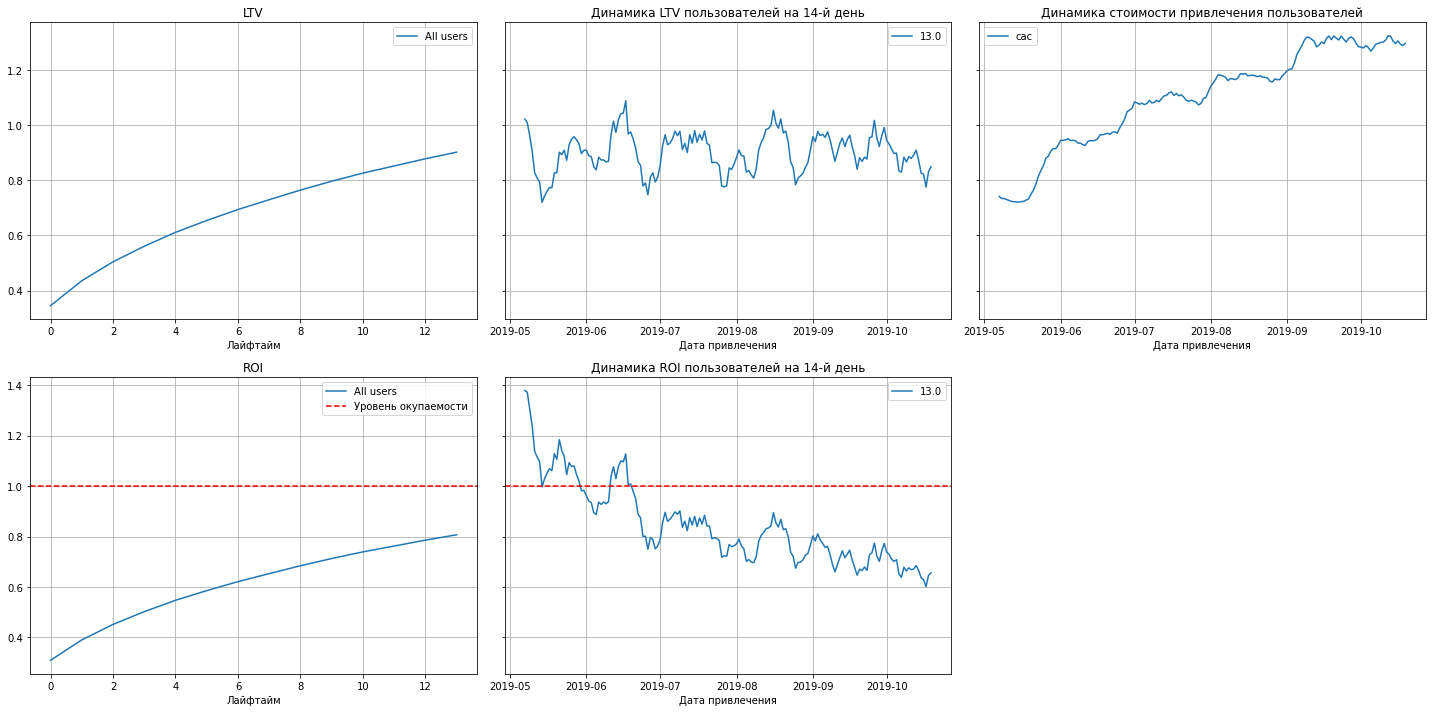

In [36]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Вывод**

<p></p>
<div style="border:solid green 2px; padding: 20px">
<div>По графикам можно сделать такие выводы:
<div>Реклама не окупается. ROI в конце недели — около 80%. И не пересекает линию окупаемости. 
<div>CAC не стабилен. Значит, дело может быть в постоянном увеличении рекламного бюджета. График динамики САС показывает, что расходы на рекламу во времени значительно увеличиваются.
<div>LTV достаточно стабилен, он показывает "пожизненную ценность" клиента, т.е. общую сумму денег, которую один клиент в среднем приносит компании со всех своих покупок. Кривая LTV на графике плавно растет от 0 и не пересекает единицу. Это подтверждает то, что момент и горизонт анализа заданы верно. Следовательно, дело не в ухудшении качества пользователей. 

**6.2.Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.**

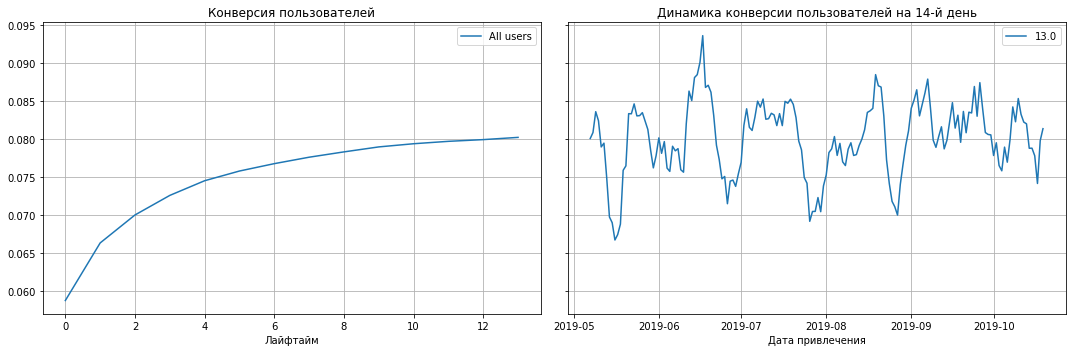

In [37]:
# смотрим конверсию и динамику её изменения

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, #dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Вывод**

<p></p>
<div style="border:solid green 2px; padding: 20px">
<div>По графикам можно сделать такие выводы:
<div>Пользователи конвертируются очень хорошо, причём постоянно. Видимо, дело в удержании. Вызовем функции get_retention() и plot_retention(), чтобы рассчитать и отразить на графиках этот показатель.

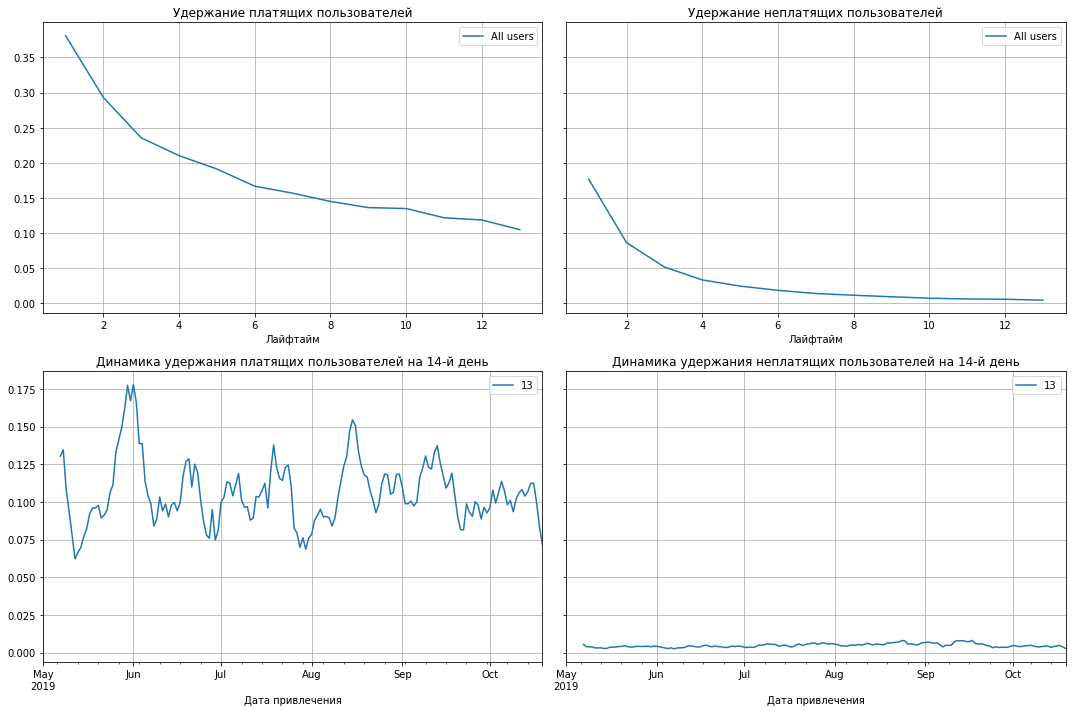

In [38]:
# смотрим удержание и динамику её изменения

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, #dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод**

<p></p>
<div style="border:solid green 2px; padding: 20px">
<div>По графикам можно сделать такие выводы:
<div>Действительно, пользователи очень плохо удерживаются. Удержание платящих пользователей на графике убывает по экспоненциальному закону (то есть в первый день жизни пользователя удержание равно единице, и далее бесконечно приближается к нулю). Если сравнить удержание платящих и неплатящих пользователей, то можно заметить, что удержание неплатящих пользователей убывает быстрее, чем удержание платящих. Кривая платящих пользователей находится выше, чем кривая неплатящих. 
<div> Динамика неплатящих пользователей стабильно около нуля, так как не происходит никаких покупок.

**6.3.Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.**

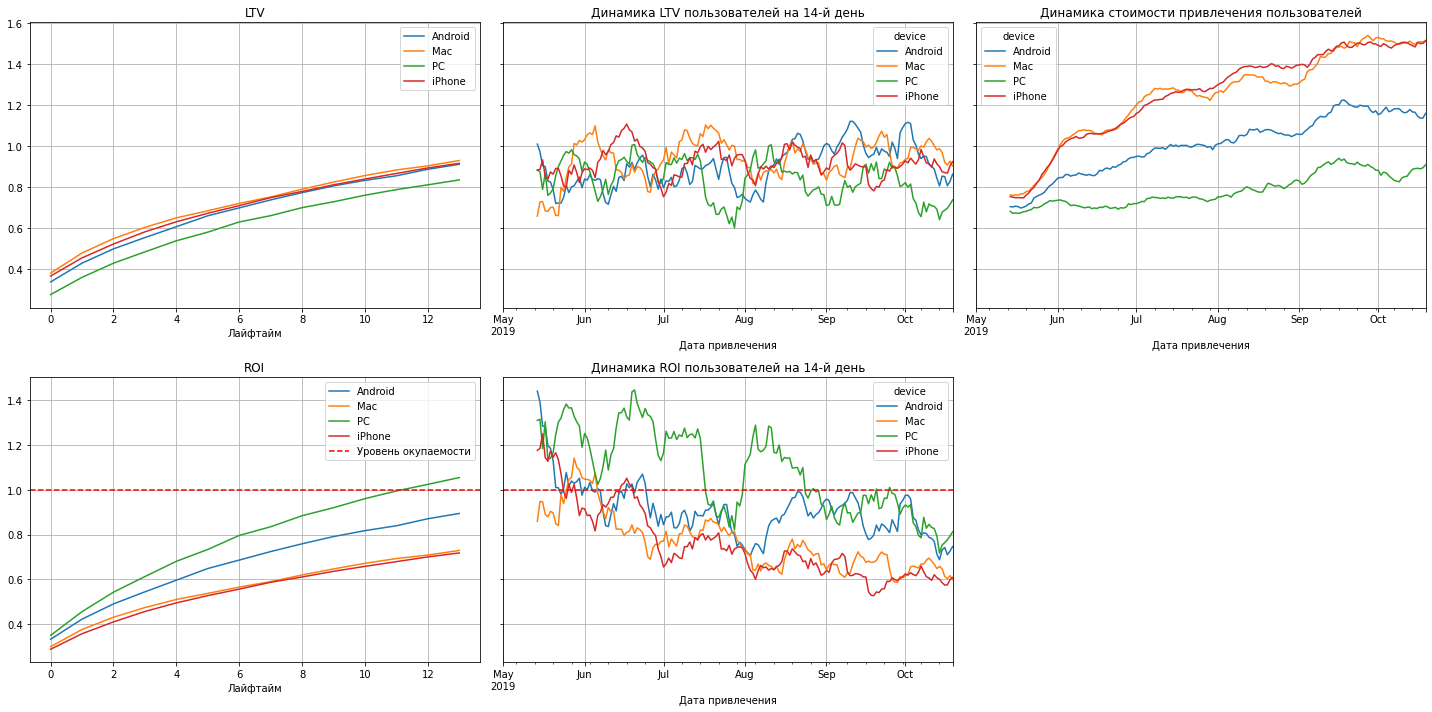

In [39]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод**

<p></p>
<div style="border:solid green 2px; padding: 20px">
<div>По графикам можно сделать такие выводы:
<div> Только пользователи PC стабильно окупаются, а вот владельцы iPhone, Mac и Android — нет.
<div> Причем ROI примерно одинаковы у пользователей устройств iPhone и Mac.
<div>Согласно графику LTV пользователи с устройства PC приносят меньше всего денег, но и стоимость привлечения этих пользователей самая низкая. По динамике стоимости привлечения пользователей самые большие расходы у отдела маркетинга на пользователей устройств iPhone и Maс. Но при этом они не окупаются, а на привлечение с устройств PC тратится меньше денег и они окупаются, LTV при этом низкий. 

**6.4.Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.**

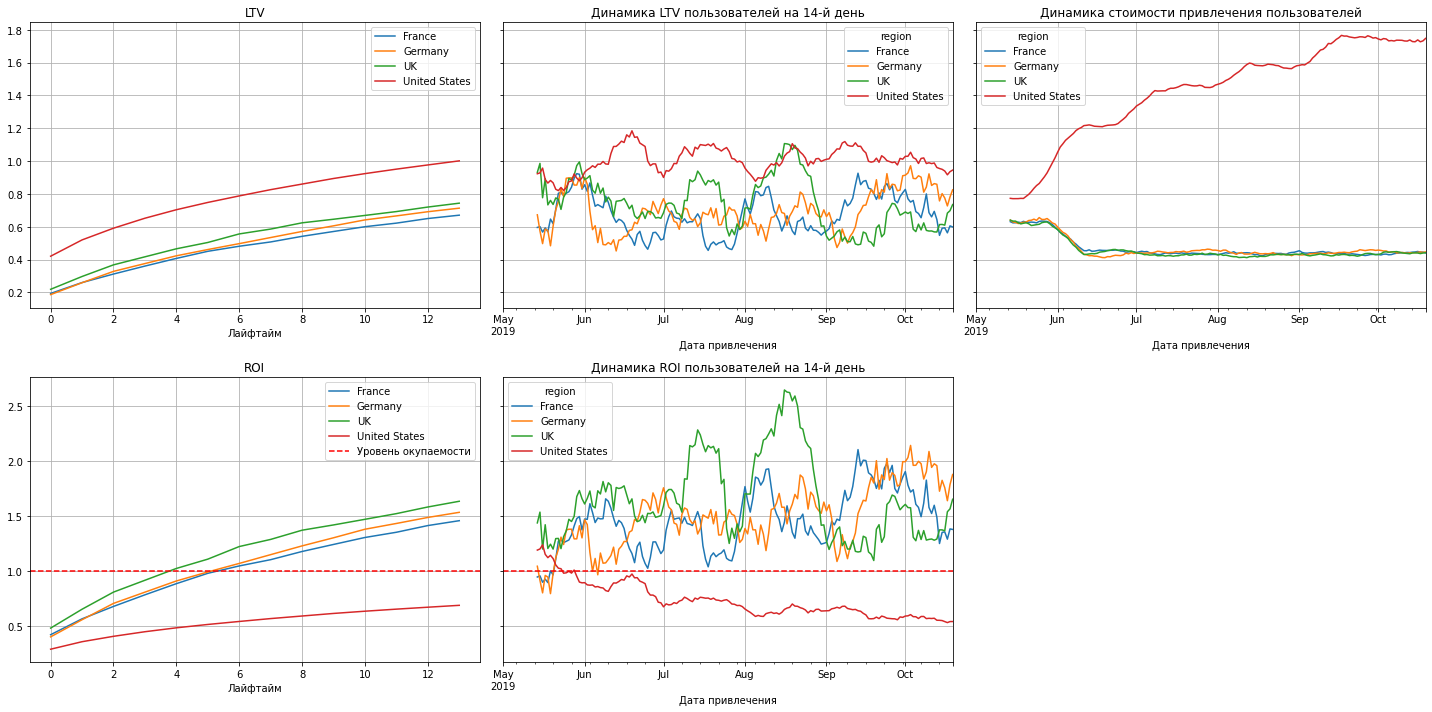

In [40]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод**

<p></p>
<div style="border:solid green 2px; padding: 20px">
<div>По графикам можно сделать такие выводы:
<div> С разбивкой по странам становится более менее понятно распределение. Реклама не окупается только в США. Во Франции, Германии и Великобритании реклама окупается (согласно графику ROI и динамике ROI пользователей на 14-ый день).
<div> По динамике стоимости привлечения пользователей лидирующие позиции занимает страна США. При этом стоимость привлечения пользователей для других стран стабильна и примерно одинаковая. 
<div> Показатель LTV также стабилен. Больше всего выручку приносят пользователи приложения из США (согласно графику расчета LTV.
<div>Теперь проверим источники привлечения (channel). Возможно, на окупаемость влияет неудачная реклама в каком-нибудь одном канале.

**6.5.Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.**

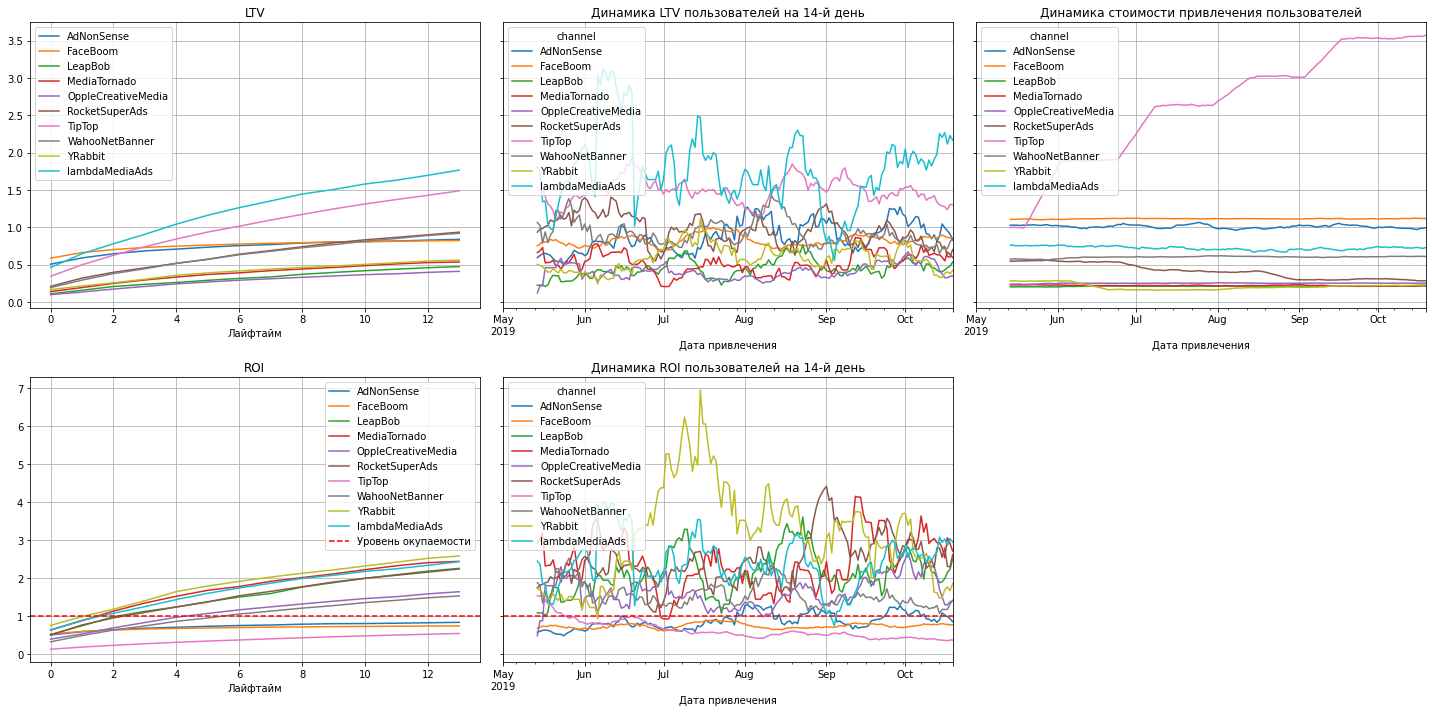

In [41]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод**

<p></p>
<div style="border:solid green 2px; padding: 20px">
<div>По графикам можно сделать такие выводы:
<div> Не окупается реклама на ТipTop, FaceBoom и AdNonSense. Все остальные источники запуска рекламы - окупаются. Пользователи, пришедшие через рекламу на LambdaMediaAds приносят больше всего денег.
<div> По затратам на запуск рекламных кампаний лидирующие позиции с большим отрывом, относительно других рекламных кампаний, занимает TipTop. Затраты на запуск рекламы через FaceBoom стабильны на протяжении всего анализируемого периода. 

**6.6.Ответьте на такие вопросы:
Окупается ли реклама, направленная на привлечение пользователей в целом?
Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
Чем могут быть вызваны проблемы окупаемости?**

**Промежуточный вывод**

<p></p>
<div style="border:solid green 2px; padding: 20px">
<div> <b>1. Окупается ли реклама, направленная на привлечение пользователей в целом? </b><br><br>
<div> Реклама, направленная на привлечение пользователей в целом не окупается. ROI в конце недели — около 80%, то есть не пересекает линию окупаемости. 
<div>CAC не стабилен. Значит, дело может быть в постоянном увеличении рекламного бюджета. График динамики САС показывает, что расходы на рекламу во времени значительно увеличиваются.
<br><br>
<div> <b>2. Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы? </b><br><br>
<div> Негативное влияние на окупаемость рекламы в разбивке по устройствам оказывают владельцы iPhone, Maс и Android. По динамике стоимости привлечения пользователей самые большие расходы у отдела маркетинга на пользователей устройств iPhone и Maс.
<div> Негативное влияние на окупаемость рекламы в разбивке по странам оказывает США. По динамике стоимости привлечения пользователей лидирующие позиции занимает страна США.
<div> Негативное влияние на окупаемость рекламы в разбивке по рекламным каналам оказывают следующие каналы продвижения: ТipTop, FaceBoom и AdNonSense. По затратам на запуск рекламных кампаний лидирующие позиции с большим отрывом, относительно других рекламных кампаний, занимает канал TipTop.
<br><br>
<div> <b>3. Чем могут быть вызваны проблемы окупаемости? </b><br><br>
<div> Проблемы окупаемости могут быть связаны с несколькими причинами. Одна из них, пользователи устройств iPhone или Maс могли столкнуться с блокировками рекламы или у них могли возникнуть технические ошибки при оплате приложения. Версию с техническими ошибками можно было бы проверить, если были бы данные о дополнительных событиях. К сожалению, в данном проекте они не раскрыты. Но для проверки гипотезы, можно запросить данные у разработчиков приложения. В случае, если доля "проблемных пользователей" окажется с большим отрывом именно по пользователям с использованием устройств iPhone или Maс, гипотеза подтвердится. 

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

**ОБЩИЙ ВЫВОД**

<p></p>
<div style="border:solid green 2px; padding: 20px">
<div> <b>1. Причины неэффективности привлечения пользователей:</b>  <br><br>
<div><div>1.1. Установлена блокировка рекламы в США на устройствах iPhone и Maс. Возможно, это из-за  того, что большинство пользователей используют предустановленный в ОС браузер Safari на этих устройствах. Safari имеет встроенную систему блокировки контента, которая предотвращает появление на веб-сайте рекламы, всплывающих окон, трекеров и других нежелательных элементов. Этот параметр включен по умолчанию, но его может отключить пользователь в настройках Safari, чтобы веб-сайт со всеми его элементами выглядел так, как задумано.<br><br>
<div> 1.2.Также одной из причин неэффективности привлечения пользователей могут быть технические ошибки при оплате с устройств iPhone и Maс в приложении Procrastinate Pro+. В данном случае необходимо обратиться к разработчикам приложения Procrastinate Pro+ и запросить дополнительную информацию по пользователям. Необходимо будет провести дополнительное расследование.<br><br>
<div> 1.3. Как ещё одну причину неэффективности пользователей, можно отметить, что пользователи устройств iPhone и Maс составляют 56,3% от всех пользователей, что является существенной долей. Следовательно, необходимо провести корректировку рекламной стратегии с уклоном на пользователей этих устройств.
<br><br>
<div> <b>2. Рекомендации для отдела маркетинга:</b>   <br><br>
<div><div> 2.1. Необходимо скорректировать рекламную стратегию. Так как негативное влияние на окупаемость рекламы в разбивке по устройствам оказывают владельцы iPhone и Maс. По динамике стоимости привлечения пользователей самые большие расходы у отдела маркетинга на пользователей устройств iPhone и Maс, необходимо сократить данные  расходы и одновременно увеличить затраты на запуск эффективных рекламных кампаний, например через канал LambdaMediaAds. Пользователи, пришедшие через рекламу на LambdaMediaAds приносят больше всего денег.<br><br>
<div><div> 2.2. Скорректировать распределение бюджета по каналам запуска рекламы. Максимальные затраты на запуск рекламы приходятся на канал TipTop. При этом данный канал не окупается. Показатель ROI имеет самое низкое расположение на графике. <br><br>
<div><div> 2.3. Так как из США пользователи приходят в приложение и именно на них приходится больше всего платящих пользователей, необходимо более детально провести анализ внутри этих 100 002 уникальных пользователей (доля пользователей из США составляет 67%, что является значительным по отношению к другим странам). <br><br>
<div><div> 2.4. Обратить внимание на метрику Retention Rate, так как пользователи конвертируются хорошо, возможно, есть проблемы с удержанием.